In [1]:

import networkx as nx
import matplotlib.pyplot as plt


In [2]:
G = nx.DiGraph()
pos = { 0 : (0,0) , 1 : (-1,-1) , 2 : (-1 , 0) , 3 : (-1,3) ,
                    4 : (0,1)   , 5 : ( 0,-1)  , 
                    6 : (1,-3)  , 7 : (1,0)    , 8 : (1,1)
      }

for k,v in pos.items() :
    pos[k] = (v[0] + 5 , v[1] + 5)

for k,v in pos.items() :
    pos[k] = (v[0]+0,v[1]+0)

for n in range(1,9) :
        G.add_edge(0,n)
        n += 1


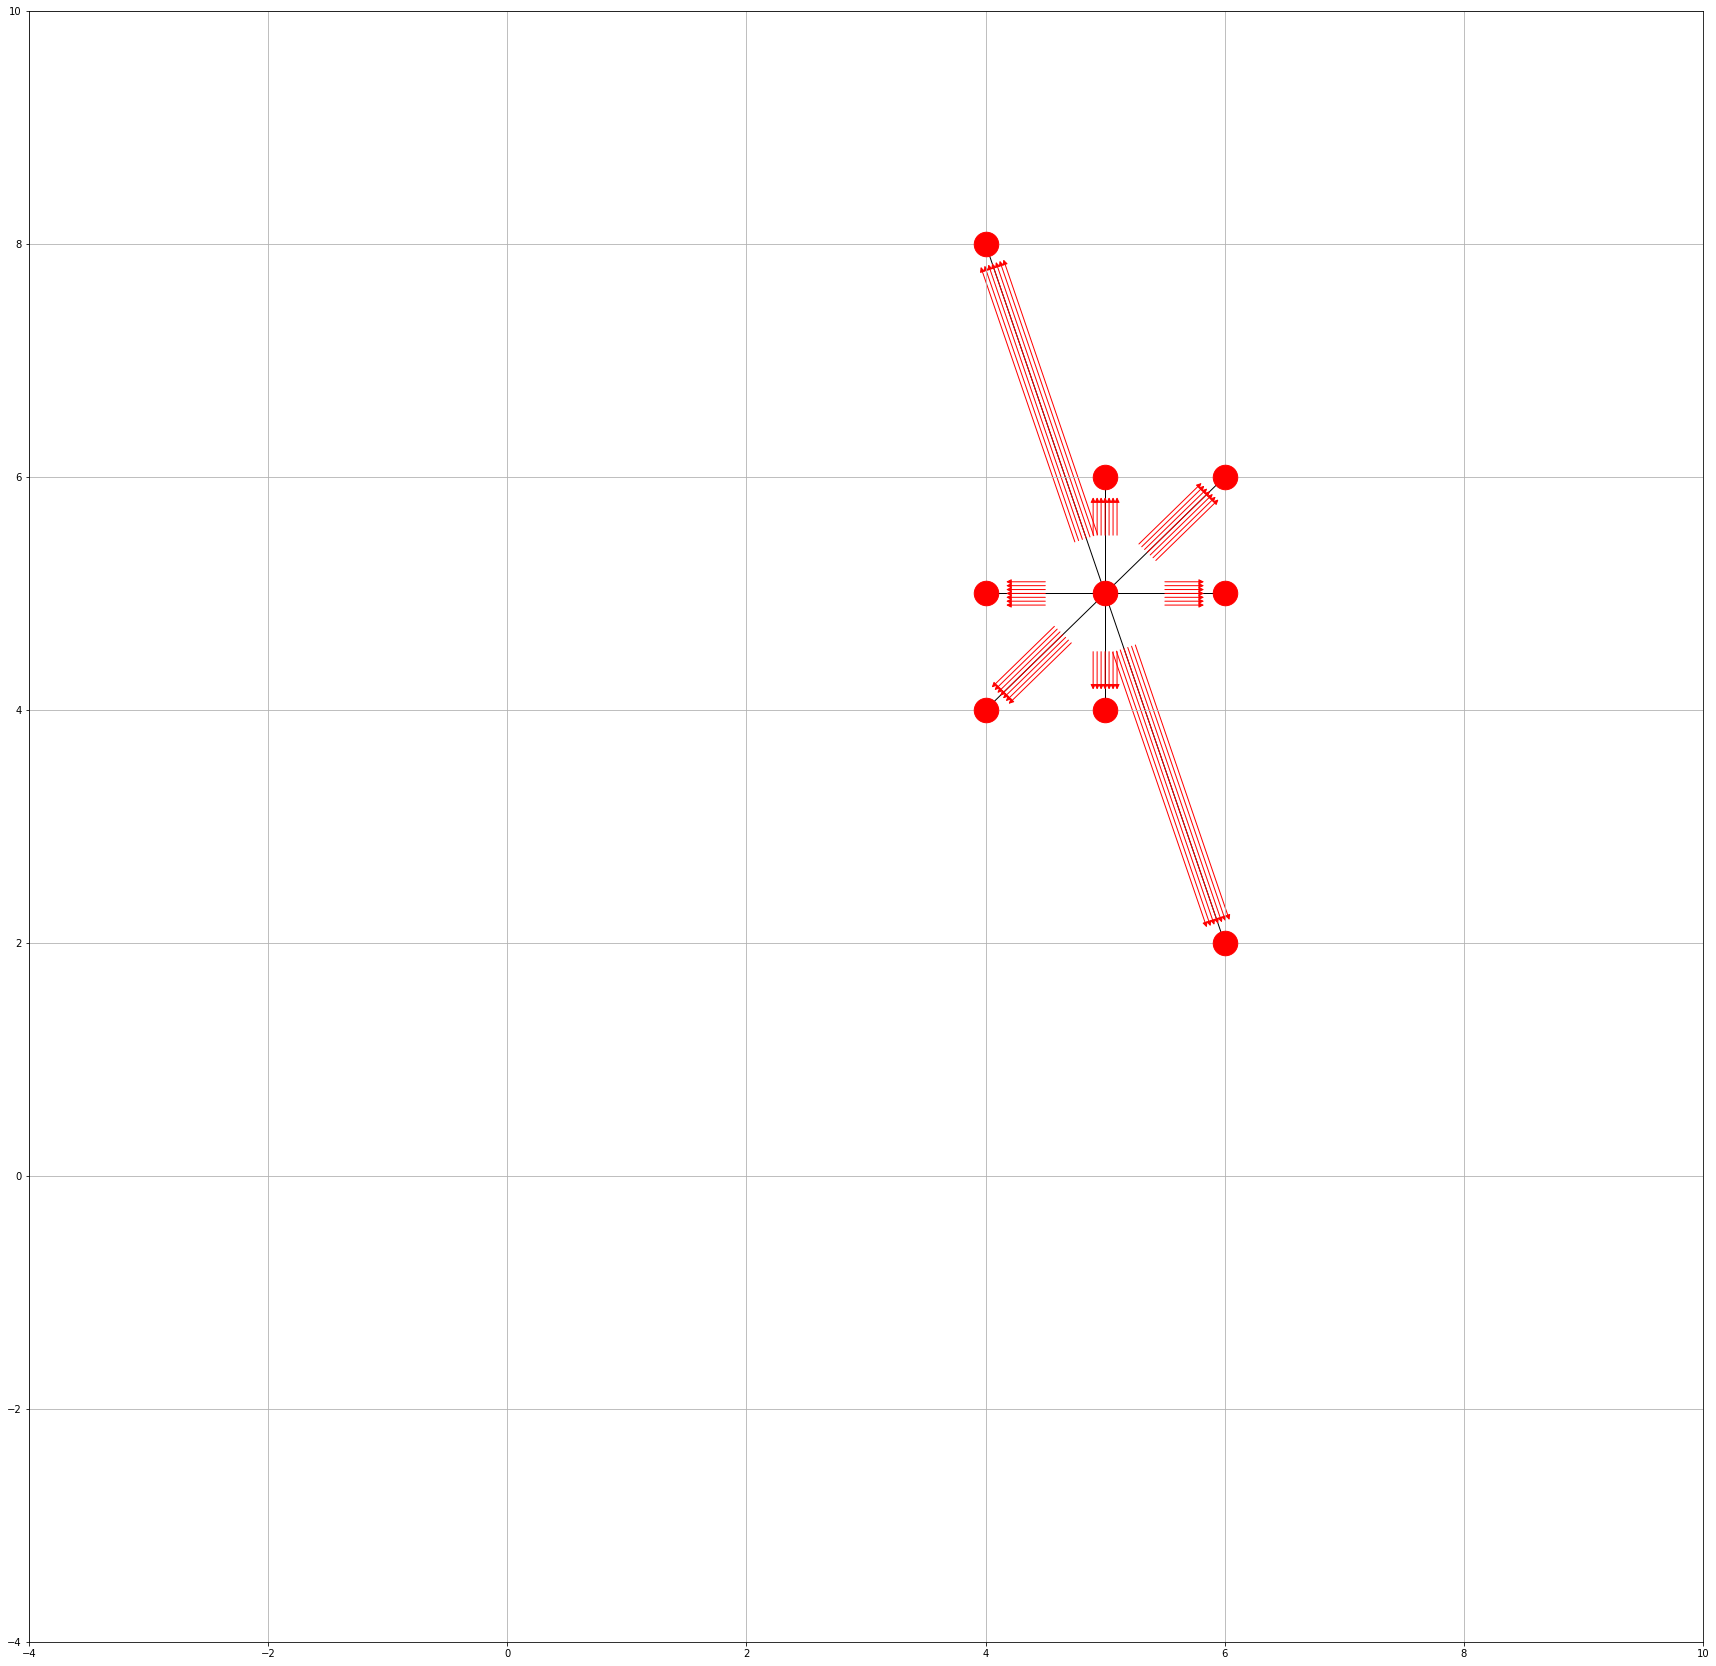

In [11]:
#pos = {0 : (0,0) , 1 : (1,2.5) , 2 : (2,1) , 3 : (-1,2)}


def highlightEdgeVector(G,pos,edgelist=False,distance=[-0.5 , -0.25 , 0.25 , 0.5 ] , 
                        tail=0.2 , head = 0.2 , edge_color='black', width=1 , alpha = 1 ,
                        style='tapered'
                       ):
    
    import math
    from math import cos
    from math import sin
    from math import pi
    
    def rotate(p , theta) :
        x = p[0]
        y = p[1]
        x1 =  x*cos(theta) + y*sin(theta)
        y1 = -x*sin(theta) + y*cos(theta)
        return (x1,y1)
    
    for delta in distance :
        if (edgelist == False) : edgelist = G.edges()
        for edge in edgelist :
            s = edge[0]
            t = edge[1]
            
            spos = pos[s]
            tpos = pos[t]

            spost = (0,0)
            tpost = (tpos[0] - spos[0],tpos[1]-spos[1])
            
            theta = math.acos( abs(tpost[0] - spost[0]) / math.sqrt((tpost[0]-spost[0])**2 + (tpost[1]-spost[1])**2) )


            if ((tpost[0] > spost[0]) & (tpost[1] < spost[1]))   : sgn = -1 
            elif ((tpost[0] < spost[0]) & (tpost[1] > spost[1])) : sgn = -1 
            else : sgn = 1

            theta = theta * sgn
            
            srpos = rotate(spost,theta)
            trpos = rotate(tpost,theta)

            if (srpos[0] > trpos[0]) : sgn = -1
            else :                     sgn = 1

            srpos = (srpos[0] + sgn*abs(tail) , srpos[1] + delta)
            trpos = (trpos[0] - sgn*abs(head) , trpos[1] + delta)

            spos1 = rotate(srpos,-theta)
            tpos1 = rotate(trpos,-theta)
 
            new_pos={}
            if (style == 'tapered') :
                new_pos[s] = spos
            else :
                new_pos[s] = (spos1[0]+spos[0],spos1[1]+spos[1])
                
            new_pos[t] = (tpos1[0]+spos[0],tpos1[1]+spos[1])
        
            nx.draw_networkx_edges(G,pos=new_pos , edgelist=[(s,t)] , width=width , edge_color=edge_color , alpha=alpha)   

fig = plt.figure(figsize=(30,30))
ax = plt.subplot(111)
ax.set_xlim([-4,10])
ax.set_ylim([-4,10])
nx.draw_networkx_nodes(G,pos,node_shape='o',node_size=600 , alpha = 1)
nx.draw_networkx_edges(G,pos , arrows=False)

for edge in G.edges() :
    highlightEdgeVector(G,edgelist=[edge] , 
                        pos=pos,distance = [i/30 for i in range(-3,4)] , 
                        tail=0.5 , head=0.1 , style='parallel' , edge_color='red'
                       )


ax.grid(True)
plt.show()